In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.mstats import kruskalwallis
from scipy.stats import wilcoxon
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize']=16
plt.rcParams['axes.titlesize']=16

# $^{222}Rn$

In [2]:
EAM_Rn = [8.211480729123378, 9.208639915953292, 8.514089584350586, 8.322871674882604, 8.150424510874647, 8.526771139591299, 8.307480791781812, 8.621930791976604, 8.220381229481799, 8.403754741587537, 8.480089796350358, 8.563497624498732, 8.175465117109583, 8.29117425959161, 8.963435152743726, 8.061902472313415, 8.142905296163356, 8.604449779429334, 8.200639602985788, 8.299986981331035, 8.248483820164457, 8.127263779335834, 8.297681727307909, 8.25263940527084, 8.225357623810464]

# $^{222}Rn + T$

In [3]:
EAM_RnT_BCN = [8.059945654361806, 8.03970312564931, 8.12277168923236, 8.053294607933532, 8.048365126264857, 8.165090114512342, 8.02081221722542, 8.061697614953873, 8.185345507682637, 8.413906503230967, 8.132826094931744, 8.1881618093937, 8.251170665659803, 8.117733082872755, 8.350974224983378, 7.956330563159699, 8.038048358673745, 8.065417675261802, 8.0369804463488, 8.129734850944356, 8.102025661062687, 8.101720079462579, 8.135596863766933, 8.027808940156977, 8.28533558135337]
EAM_RnT_PMP = [8.048338423383997, 8.061835918020694, 8.010926185770238, 7.947391794082966, 8.436416666558449, 8.059653180710812, 8.212462526686648, 8.13142910409481, 8.318235965485268, 8.11553975369068, 8.016166605847948, 8.170698084729784, 8.160849753846513, 8.226865322031873, 8.555549986819004, 8.194006899569898, 8.282557548360622, 8.095395757796917, 8.102666895440285, 8.380331404665684, 8.062647920973758, 8.130499251345372, 8.203159900421792, 8.082500985328187, 8.104652485948927]
EAM_RnT_ZGZ = [8.344254067603577, 8.07323772349256, 8.18323585834909, 8.246122157320062, 8.079329957353307, 8.133613464680124, 8.202599910979576, 8.189216451441988, 8.144079573610997, 8.356861033338182, 8.205509226372902, 8.233928761583693, 8.160559431035468, 8.25779160032881, 8.249153096625145, 8.072600141484687, 8.264818029200777, 8.10154943263277, 8.342795716955306, 8.31978436733814, 8.241368922781437, 8.261904817946414, 8.259412603175386, 8.172716952384786, 8.345493763051135]
EAM_RnT_HSC = [8.281530583158453, 8.28206115073346, 8.177005159093978, 8.052565513773168, 8.24305834668748, 8.182604972352372, 8.053872169332301, 8.083223383477394, 8.251345898242707, 8.172950541719477, 8.06568088937313, 8.290624862021588, 8.129040657205785, 8.125324898577752, 7.993029979949302, 8.35301245019791, 8.3312279315705, 8.177043387230407, 7.969878988063082, 8.030435237478702, 8.054201572499377, 8.09184658781011, 8.273422038301508, 8.114550732551738, 8.039057264936732]

In [4]:
X = [EAM_Rn, EAM_RnT_BCN, EAM_RnT_PMP, EAM_RnT_ZGZ, EAM_RnT_HSC]
lbl = ['Rn', 'Rn+T BCN', 'Rn+T PMP', 'Rn+T ZGZ', 'Rn+T HSC']

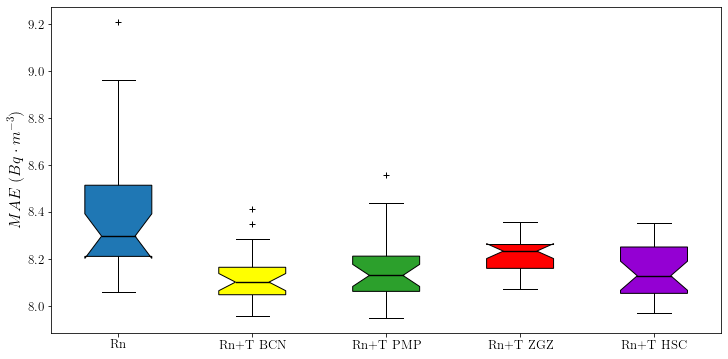

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
bplot = ax.boxplot(X, sym='+', labels=lbl, patch_artist=True, notch=True, 
                   medianprops=dict(linestyle='-', linewidth=1.4, color='k'))
plt.ylabel('$MAE\ (Bq \cdot m^{-3})$')
colors = ['#1f77b4', 'yellow', '#2ca02c', 'red', 'darkviolet']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
#fig.savefig('../Figures/CNN/MAE_Boxplot.png', dpi=300)

# Kruskal-Wallis
En estadística, la prueba de Kruskal-Wallis (de William Kruskal y W. Allen Wallis) es un método no paramétrico para probar si un grupo de datos proviene de la misma población. Intuitivamente, es idéntico al ANOVA con los datos reemplazados por categorías. Es una extensión de la prueba de la U de Mann-Whitney para 3 o más grupos.

Ya que es una prueba no paramétrica, la prueba de Kruskal-Wallis no asume normalidad en los datos, en oposición al tradicional ANOVA. Sí asume, bajo la hipótesis nula, que los datos vienen de la misma distribución. Una forma común en que se viola este supuesto es con datos heterocedásticos. 

In [6]:
print('Kruskal Wallis between BCN and PMP :', kruskalwallis(X[1], X[2]))
print('Kruskal Wallis between BCN and ZGZ :', kruskalwallis(X[1], X[3]))
print('Kruskal Wallis between BCN and HSC :', kruskalwallis(X[1], X[4]))

Kruskal Wallis between BCN and PMP : KruskalResult(statistic=1.2017882352940887, pvalue=0.27296456041325035)
Kruskal Wallis between BCN and ZGZ : KruskalResult(statistic=11.33261176470586, pvalue=0.0007615771424191868)
Kruskal Wallis between BCN and HSC : KruskalResult(statistic=0.9984941176470556, pvalue=0.31767516186993683)


In [7]:
print('Kruskal Wallis between PMP and ZGZ :', kruskalwallis(X[2], X[3]))
print('Kruskal Wallis between PMP and HSC :', kruskalwallis(X[2], X[4]))

Kruskal Wallis between PMP and ZGZ : KruskalResult(statistic=4.764705882352928, pvalue=0.029049022161940746)
Kruskal Wallis between PMP and HSC : KruskalResult(statistic=0.011388235294106153, pvalue=0.9150145467573126)


In [8]:
print('Kruskal Wallis between ZGZ and HSC :', kruskalwallis(X[3], X[4]))

Kruskal Wallis between ZGZ and HSC : KruskalResult(statistic=4.350588235294111, pvalue=0.03699616569833828)


In [9]:
print('Kruskal Wallis between the 4 cities :', kruskalwallis(X[:-1]))

Kruskal Wallis between the 4 cities : KruskalResult(statistic=28.093259405940614, pvalue=3.471958694804895e-06)


# V2

In [2]:
EAM_Rn = [7.957026462928922, 8.829230102838254, 8.82228993434532, 6.7291641609341495, 6.484147202734854, 5.728721543854358, 5.414373622221105, 7.374995474721871, 6.4537142959295535, 6.119189168892655, 6.428095163083544, 6.986444211473652, 6.054645800123028, 6.072771857766544, 6.662684571509268, 6.567270914713542, 5.728116802140778, 7.062237459070542, 5.830522238039503, 6.155300514370787, 5.328276391122856, 7.665476742912741, 5.856595768648035, 5.921784008250517, 5.988234950046913]

In [3]:
EAM_RnT_BCN = [6.640592799467199, 6.752361484602386, 6.566429212981579, 6.554271884993011, 6.9334148332184435, 6.43499542685116, 6.239002003389246, 6.307730356852214, 7.460333805458219, 6.3705578972311585, 7.211331049601237, 6.353525273940143, 7.63083719739727, 5.979975868673885, 7.167679132199755, 6.882324742335899, 6.720657124238856, 7.014494091856713, 6.546930761898265, 5.959228889614928, 7.437941644705978, 7.236246333402746, 8.616805506687538, 6.123318990071614, 6.908850838156307]
EAM_RnT_PMP = [6.476646572935815, 7.264290716133866, 6.505566802679324, 6.383237389957204, 6.750935573203891, 7.284977520213408, 5.924745447495404, 6.889391469020469, 6.627223033531039, 6.254274480483112, 6.670552571614583, 7.322537553076651, 6.574525010352041, 6.420104419483858, 6.96022071090399, 7.448443244485294, 6.677722930908203, 7.0180017059924555, 6.923133401309743, 7.26979969997032, 6.111400604248047, 8.436556348613664, 6.069889106002509, 6.6524842954149435, 6.3160067539589075]
EAM_RnT_ZGZ = [6.371614680570715, 7.137910768097522, 6.813130210427677, 7.286964154710956, 6.670178993075502, 6.076452816233916, 6.731590009203144, 6.451763377470129, 6.157823899213006, 7.731760286817364, 6.461606792375153, 6.544927073459999, 6.903651256187289, 6.4203742906159045, 8.103279861749387, 6.691247117285635, 7.099449008118873, 6.493941250969382, 5.922455581964231, 6.738455080518536, 6.706917183071959, 5.8234495649150775, 6.682252996108112, 6.471171696980794, 6.505207585353477]
EAM_RnT_HSC = [8.51159106983858, 6.356553208594229, 6.953885396321614, 6.330532859353458, 6.585010042377546, 6.8170348148719935, 6.678549074659161, 6.478125852697036, 6.39091895608341, 8.424645255593692, 6.427627675673541, 6.0703196432076245, 6.470955343807445, 6.181999917123832, 7.187143587598614, 7.406943040735581, 6.428633521584904, 6.136665830425188, 7.082850400139304, 6.28369888604856, 6.237776326198204, 6.5261895422841985, 7.044385087256338, 5.876008763032801, 6.137154223872166]

In [4]:
X = [EAM_Rn, EAM_RnT_BCN, EAM_RnT_PMP, EAM_RnT_ZGZ, EAM_RnT_HSC]
lbl = ['Rn', 'Rn+T BCN', 'Rn+T PMP', 'Rn+T ZGZ', 'Rn+T HSC']

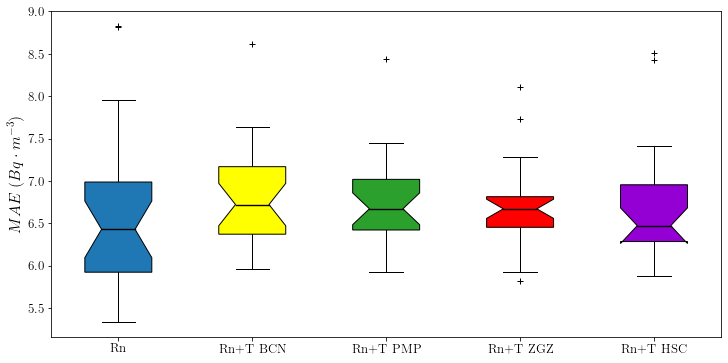

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
bplot = ax.boxplot(X, sym='+', labels=lbl, patch_artist=True, notch=True, 
                   medianprops=dict(linestyle='-', linewidth=1.4, color='k'))
plt.ylabel('$MAE\ (Bq \cdot m^{-3})$')
colors = ['#1f77b4', 'yellow', '#2ca02c', 'red', 'darkviolet']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
#fig.savefig('../Figures/CNN/MAE_Boxplot_v2.png', dpi=300)

In [6]:
print('Kruskal Wallis between BCN, PMP, HSC, ZGZ :', kruskalwallis(X[1], X[2], X[3], X[4]))

Kruskal Wallis between BCN, PMP, HSC, ZGZ : KruskalResult(statistic=1.9782178217821524, pvalue=0.576939964052124)


In [7]:
print('Wilcoxon between Rn and PMP', wilcoxon(X[0], X[2]))

Wilcoxon between Rn and PMP WilcoxonResult(statistic=94.0, pvalue=0.06531098743285503)


In [8]:
DF = pd.DataFrame({'Rn': EAM_Rn,
                  'BCN': EAM_RnT_BCN,
                  'PMP': EAM_RnT_PMP,
                  'ZGZ': EAM_RnT_ZGZ,
                  'HSC': EAM_RnT_HSC})

In [9]:
DF.describe()

,Rn,BCN,PMP,ZGZ,HSC
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.568852,6.801993,6.769307,6.679903,6.681008
std,0.945071,0.596355,0.542652,0.512125,0.656250
min,5.328276,5.959229,5.924745,5.823450,5.876009
25%,5.921784,6.370558,6.420104,6.451763,6.283699
50%,6.428095,6.720657,6.670553,6.670179,6.470955
75%,6.986444,7.167679,7.018002,6.813130,6.953885
max,8.829230,8.616806,8.436556,8.103280,8.511591


# 3 Forward

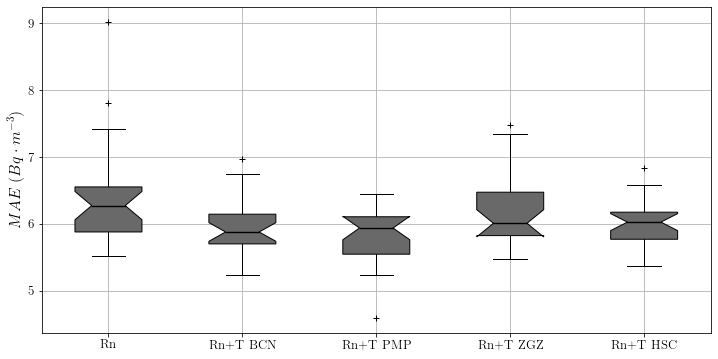

In [10]:
EAMRn =  [6.455543160438538, 7.072296301523845, 5.512895782788594, 6.013731161753337, 5.69798743724823, 7.423967639605205, 6.364539464314778, 6.2372556527455645, 6.473839322725932, 5.8800021807352705, 5.93059766292572, 7.802989721298218, 6.162115295728047, 5.541943788528442, 7.414313832918803, 6.553581555684407, 5.6810409228007, 5.992370208104451, 5.542460680007935, 6.526913444201152, 5.636475443840027, 6.901504993438721, 9.021165450414022, 6.334753394126892, 6.274289449055989]
EAM_BCN =  [6.16275954246521, 5.701338926951091, 5.853175123532613, 6.004204909006755, 5.4231016635894775, 6.746338407198588, 6.384002288182576, 5.861535906791687, 5.879589597384135, 5.776523272196452, 5.59281591574351, 6.045260588328044, 6.966628034909566, 6.346726099650065, 6.0387217203776045, 6.139764428138733, 5.813184499740601, 5.939867337544759, 5.598189036051433, 5.696633179982503, 5.33791979153951, 5.242201288541158, 5.7235389947891235, 6.566652894020081, 6.145748297373454]
EAM_PMP =  [6.171736081441243, 6.032948096593221, 6.2267671426137285, 4.585991024971008, 6.069047768910726, 5.547447760899861, 5.408446550369263, 6.440662860870361, 5.938269257545471, 6.103848417599996, 5.331648786862691, 5.238194584846497, 6.373743335405986, 5.51784360408783, 6.392698725064595, 6.356711149215698, 5.545058290163676, 5.684237281481425, 5.954345782597859, 6.107104063034058, 5.698317170143127, 5.9570006132125854, 5.6505701541900635, 5.7907891273498535, 5.938798189163208]
EAM_ZGZ =  [5.578525900840759, 5.761840144793193, 7.172967553138733, 6.152630845705668, 7.4824966589609785, 5.977097352345784, 5.487711985905965, 5.622631867726644, 5.825459241867065, 6.755466143290202, 6.267374952634175, 6.515908757845561, 5.8914981285731, 5.482475479443868, 7.341012318929036, 6.474547028541565, 6.371235688527425, 5.8407972653706866, 5.842097957928975, 5.589353879292806, 6.009651740392049, 6.356587092081706, 5.969763000806172, 6.107420245806376, 6.880016803741455]
EAM_HSC =  [6.583736300468445, 6.8315335512161255, 5.941060423851013, 6.273655613263448, 5.631256262461345, 5.444688558578491, 6.097360412279765, 6.071695446968079, 6.005175630251567, 5.371678511301677, 6.4383284250895185, 6.076025525728862, 5.479027152061462, 6.510177731513977, 6.027319272359212, 6.199570616086324, 6.122778534889221, 5.7268762191136675, 5.845083475112915, 6.002572337786357, 6.0272230704625445, 5.770824631055196, 5.916007041931152, 5.7001872062683105, 6.175832788149516]
# Boxplot:
X = [EAMRn, EAM_BCN, EAM_PMP, EAM_ZGZ, EAM_HSC]
lbl = ['Rn', 'Rn+T BCN', 'Rn+T PMP', 'Rn+T ZGZ', 'Rn+T HSC']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
bplot = ax.boxplot(X, sym='+', labels=lbl, notch=True, patch_artist=True,
                   medianprops=dict(linestyle='-', linewidth=1.4, color='k'))
plt.grid()
plt.ylabel('$MAE\ (Bq \cdot m^{-3})$')
colors = ['dimgray']*5
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

In [19]:
print('Kruskal Wallis between Rn, BCN, PMP:', kruskalwallis(X[0], X[1], X[2]))

Kruskal Wallis between Rn, BCN, PMP: KruskalResult(statistic=7.346694736842096, pvalue=0.02539133338691291)


In [20]:
np.quantile(EAMRn, 0.25)

5.8800021807352705

In [11]:
print('Wilcoxon between Rn and PMP', wilcoxon(X[0], X[2]))
print('Wilcoxon between Rn and BCN', wilcoxon(X[0], X[1]))

Wilcoxon between Rn and PMP WilcoxonResult(statistic=60.0, pvalue=0.005816358945786271)
Wilcoxon between Rn and BCN WilcoxonResult(statistic=71.0, pvalue=0.013817143683192262)


In [12]:
DF = pd.DataFrame({'Rn': EAMRn,
                  'BCN': EAM_BCN,
                  'PMP': EAM_PMP,
                  'ZGZ': EAM_ZGZ,
                  'HSC': EAM_HSC})

In [13]:
DF.describe()

,Rn,BCN,PMP,ZGZ,HSC
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.417943,5.959457,5.842489,6.190263,6.010787
std,0.827186,0.417528,0.432668,0.571711,0.355106
min,5.512896,5.242201,4.585991,5.482475,5.371679
25%,5.880002,5.701339,5.547448,5.825459,5.770825
50%,6.274289,5.879590,5.938798,6.009652,6.027223
75%,6.553582,6.145748,6.107104,6.474547,6.175833
max,9.021165,6.966628,6.440663,7.482497,6.831534


# Statistical Test

## ANN

In [4]:
DF1_Fw = pd.read_csv('../logs/ErrorsANN1Fw.csv')
DF3_Fw = pd.read_csv('../logs/ErrorsANN3Fw.csv')
DF5_Fw = pd.read_csv('../logs/ErrorsANN5Fw.csv')
DF8_Fw = pd.read_csv('../logs/ErrorsANN8Fw.csv')

In [5]:
DF1_Fw.describe().loc[['mean', 'std'], :]

,Rn,BCN,PMP,ZGZ,HSC
mean,9.541990,8.604333,8.329948,8.520877,8.475023
std,1.099934,0.809674,0.414016,0.524926,0.513359


In [6]:
DF3_Fw.describe().loc[['mean', 'std'], :]

,Rn,BCN,PMP,ZGZ,HSC
mean,8.827922,5.676458,5.438507,5.453350,5.455014
std,1.073994,0.602137,0.442925,0.392634,0.358441


In [7]:
DF5_Fw.describe().loc[['mean', 'std'], :]

,Rn,BCN,PMP,ZGZ,HSC
mean,8.316681,5.770277,5.830382,5.939263,5.921600
std,1.263897,0.557471,0.447112,0.646575,0.643211


In [8]:
DF8_Fw.describe().loc[['mean', 'std'], :]

,Rn,BCN,PMP,ZGZ,HSC
mean,7.804364,6.496309,6.537843,6.725469,6.644342
std,1.059014,0.612714,0.496684,0.608699,0.414447


In [9]:
kruskalwallis(DF8_Fw['Rn'].values, DF8_Fw['BCN'].values, DF8_Fw['PMP'].values, DF8_Fw['ZGZ'].values, 
              DF8_Fw['HSC'].values)

KruskalResult(statistic=40.11727238095233, pvalue=4.093315591830539e-08)

## CNN

In [10]:
DF1_Fw = pd.read_csv('../logs/ErrorsCNN1Fw.csv')
DF3_Fw = pd.read_csv('../logs/ErrorsCNN3Fw.csv')
DF5_Fw = pd.read_csv('../logs/ErrorsCNN5Fw.csv')
DF8_Fw = pd.read_csv('../logs/ErrorsCNN8Fw.csv')

In [11]:
kruskalwallis(DF8_Fw['Rn'].values, DF8_Fw['BCN'].values, DF8_Fw['PMP'].values, DF8_Fw['ZGZ'].values, 
              DF8_Fw['HSC'].values)

KruskalResult(statistic=23.280274285714313, pvalue=0.00011130238133294432)

The correction of Bonferroni says that the maximal pvalue might be 0.05/4 = 0.0125 < 0.0148, so this case also pass the test

## LSTM

In [12]:
DF1_Fw = pd.read_csv('../logs/ErrorsLSTM1Fw.csv')
DF3_Fw = pd.read_csv('../logs/ErrorsLSTM3Fw.csv')
DF5_Fw = pd.read_csv('../logs/ErrorsLSTM5Fw.csv')
DF8_Fw = pd.read_csv('../logs/ErrorsLSTM8Fw.csv')

In [13]:
DF1_Fw.describe().loc[['mean', 'std'], :]

,Rn,BCN,PMP,ZGZ,HSC
mean,8.572952,8.868463,9.116602,8.986385,9.412136
std,0.390313,0.882254,0.925791,0.673122,1.097649


In [14]:
DF3_Fw.describe().loc[['mean', 'std'], :]

,Rn,BCN,PMP,ZGZ,HSC
mean,4.144565,4.830308,4.811296,4.839542,4.734332
std,0.371925,0.428319,0.354966,0.632669,0.278381


In [15]:
DF5_Fw.describe().loc[['mean', 'std'], :]

,Rn,BCN,PMP,ZGZ,HSC
mean,3.999632,4.318161,4.342726,4.449620,4.366195
std,0.222396,0.154577,0.188083,0.214189,0.199033


In [16]:
DF8_Fw.describe().loc[['mean', 'std'], :]

,Rn,BCN,PMP,ZGZ,HSC
mean,4.421891,4.415500,4.401474,4.370254,4.439796
std,0.278765,0.232758,0.184885,0.211842,0.265035


In [17]:
kruskalwallis(DF8_Fw['Rn'].values, DF8_Fw['BCN'].values, DF8_Fw['PMP'].values, DF8_Fw['ZGZ'].values, 
              DF8_Fw['HSC'].values)

KruskalResult(statistic=0.364678095238105, pvalue=0.9852653064286825)